<a href="https://colab.research.google.com/github/rustambaku13/ML-Homework-2/blob/master/Homework_2_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install kaggle
!mkdir .kaggle
import json
import zipfile
token = {"username":"rustambaku13","key":"c6d933c6a18c4ce55d2a0da20c50daae"}
with open('.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json
!mkdir data
!kaggle datasets download  iarunava/cell-images-for-detecting-malaria --unzip -p data
%cd data
%cd cell_images


mkdir: cannot create directory ‘.kaggle’: File exists
- path is now set to: {/content}
mkdir: cannot create directory ‘data’: File exists
100% 336M/337M [00:03<00:00, 127MB/s]
100% 337M/337M [00:03<00:00, 117MB/s]
/content/data
/content/data/cell_images


In [0]:
%ls

Parasitized/  Uninfected/


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import models
from keras import layers
import keras
from keras.utils import to_categorical
from keras.layers.core import Dense, Dropout, Activation
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split,KFold
from sklearn.tree import export_graphviz
import xgboost as xgb
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
import cv2
import random
import matplotlib.image as mpimg
import os
from sklearn import svm
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2125, 0.7154 , 0.0721 ])

Using TensorFlow backend.


In [0]:
x = list() #create x data
y = list() # create y data
for i in os.listdir("Parasitized"): #read all parasitized data 
    if ".png" in i: #this if block for only read .png files
        path = "Parasitized/"+i # create path
        img = plt.imread(path) # and read created path
        img = cv2.resize(img,(40,40)) # resize image for lower processing power
        x.append(img) # append image to x data
        y.append(1) 
for i in os.listdir("Uninfected/"):
    if ".png" in i:
        path = "Uninfected/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(40,40))
        x.append(img)
        y.append(0)
x = np.array(x)  
y2 = np.array(y,dtype=bool)

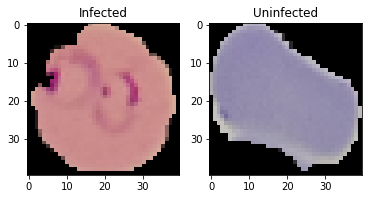

In [0]:

plt.subplot(1,2,1)
plt.title("Infected")
plt.imshow(x[y2][random.randint(1,len(x[y2]))])
plt.subplot(1,2,2)
plt.title("Uninfected")
plt.imshow(x[[not(i) for i in y2]][random.randint(1,len(x)-len(x[y2]))])

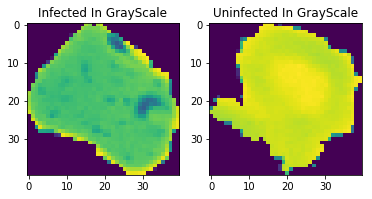

In [0]:
x = rgb2gray(x)
x.shape
plt.subplot(1,2,1)
plt.title("Infected In GrayScale")
plt.imshow(x[y2][random.randint(1,len(x[y2]))])
plt.subplot(1,2,2)
plt.title("Uninfected In GrayScale")
plt.imshow(x[[not(i) for i in y2]][random.randint(1,len(x)-len(x[y2]))])
x =x.reshape(x.shape[0],x.shape[1],x.shape[2],1)
y = to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [0]:

fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(40,40,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(2, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 40, 40, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 40, 40, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 20, 20, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       73856     
__________

In [0]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [0]:
fashion_train = fashion_model.fit(X_train,y_train, batch_size=128,epochs=5,verbose=1)


Instructions for updating:
Use tf.cast instead.
Epoch 1/5
18463/18463 [==============================] - 75s 4ms/step - loss: 0.6045 - acc: 0.6636
Epoch 2/5
18463/18463 [==============================] - 74s 4ms/step - loss: 0.3884 - acc: 0.8217
Epoch 3/5
18463/18463 [==============================] - 74s 4ms/step - loss: 0.2584 - acc: 0.8912
Epoch 4/5
18463/18463 [==============================] - 74s 4ms/step - loss: 0.1932 - acc: 0.9234
Epoch 5/5
18463/18463 [==============================] - 74s 4ms/step - loss: 0.1640 - acc: 0.9376


In [0]:
test_eval = fashion_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.18046473061615717
Test accuracy: 0.9295217152281473


In [0]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
model = ResNet50(weights='imagenet')

In [0]:
new_fashion_model = Sequential()
new_fashion_model.add(model);
new_fashion_model.add(Dense(2, activation='softmax'))

In [0]:
new_fashion_model.summary()
new_fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 1000)              25636712  
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 2002      
Total params: 25,638,714
Trainable params: 25,585,594
Non-trainable params: 53,120
_________________________________________________________________


**In my case the computer failed to compute 224 sized input because of RAM overflow but the general idea is as follows**
*We are taking a pretrained part of a neural network and appending our own model to it. Hence we get a transfer learning*

In [0]:
x_2 = list() #create x data
y_2 = list() # create y data
for i in os.listdir("Parasitized"): #read all parasitized data 
    if ".png" in i: #this if block for only read .png files
        path = "Parasitized/"+i # create path
        img = plt.imread(path) # and read created path
        img = cv2.resize(img,(224,224)) # resize image for lower processing power
        x_2.append(img) # append image to x data
        y_2.append(1) 
for i in os.listdir("Uninfected/"):
    if ".png" in i:
        path = "Uninfected/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(224,224))
        x_2.append(img)
        y_2.append(0)
x_2 = np.array(x_2)  

In [0]:
new_fashion_train = new_fashion_model.fit(X_train,y_train, batch_size=128,epochs=5,verbose=1)

ValueError: ignored